# **Speech Recognotion Exploratory Data Analysis**

# Introduction
The excersise involves trying to identify voice from amongst peoples.

**Data**


1.   5  classes of human voice
2.   2 class of Background Noice
3.   Each class of human voice has 1500 recordings each.

**Approach**
1.    **Part 1** - Performing a voice exploratory data analysis.





# Workbench
## Importing the required libraries

In [ ]:
!pip install pydub
# pip install python_speech_features

In [ ]:
!pip install python_speech_features

  Preparing metadata (setup.py) ... done
  Created wheel for python_speech_features: filename=python_speech_features-0.6-py3-none-any.whl size=5870 sha256=a2b0d1a09a989c40bc46ecf67391ee1a35e5f513ca0fdd79c7f090ffa956395b
  Stored in directory: /root/.cache/pip/wheels/5a/9e/68/30bad9462b3926c29e315df16b562216d12bdc215f4d240294
Successfully built python_speech_features


In [ ]:
import pydub

In [ ]:
import os
from tqdm import tqdm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from scipy.io import wavfile
from python_speech_features import mfcc, logfbank
import librosa
from pydub import AudioSegment


# Helper Function



1.    plot_signals -
2.    plot_fft -
3.    plot_fbank -
4.    plot_mfccs -
5.    calc_fft -
6.    envelop -





In [ ]:
def Signal_Plot(signals):
    fig,axes=plt.subplots(nrows=2,ncols=3,sharex=False,sharey=True,figsize=(20,5))
    fig.suptitle('time Series',size=16)
    i=0
    for x in range(2):
      for y in range(3):
          axes[x,y].set_title(list(signals.keys())[i])
          axes[x,y].plot(list(signals.values())[i])
          axes[x,y].get_xaxis().set_visible(False)
          axes[x,y].get_yaxis().set_visible(False)
          i += 1

In [ ]:
def RandomSampler():
  x=np.random.randint(0,1499,1)
  return x

In [ ]:
def FFT_Plot(fft):
    fig, axes = plt.subplots(nrows=2, ncols=3, sharex=False,
                             sharey=True, figsize=(20,5))
    fig.suptitle('Fourier Transforms', size=16)
    i = 0
    for x in range(2):
        for y in range(3):
            data = list(fft.values())[i]
            Y, freq = data[0], data[1]
            axes[x,y].set_title(list(fft.keys())[i])
            axes[x,y].plot(freq, Y)
            axes[x,y].get_xaxis().set_visible(False)
            axes[x,y].get_yaxis().set_visible(False)
            i += 1



In [ ]:
def fbank_plot(fbank):
    fig, axes = plt.subplots(nrows=2, ncols=3, sharex=False,
                             sharey=True, figsize=(20,5))
    fig.suptitle('Filter Bank Coefficients', size=16)
    i = 0
    for x in range(2):
        for y in range(3):
            axes[x,y].set_title(list(fbank.keys())[i])
            axes[x,y].imshow(list(fbank.values())[i],
                    cmap='hot', interpolation='nearest')
            axes[x,y].get_xaxis().set_visible(False)
            axes[x,y].get_yaxis().set_visible(False)
            i += 1

In [ ]:
def mfccs_plot(mfccs):
    fig, axes = plt.subplots(nrows=2, ncols=3, sharex=False,
                             sharey=True, figsize=(20,6))
    fig.suptitle('Mel Frequency Cepstrum Coefficients', size=16)
    i = 0
    for x in range(2):
        for y in range(3):
            axes[x,y].set_title(list(mfccs.keys())[i])
            axes[x,y].imshow(list(mfccs.values())[i],
                    cmap='coolwarm', interpolation='nearest')
            axes[x,y].get_xaxis().set_visible(False)
            axes[x,y].get_yaxis().set_visible(False)
            i += 1

In [ ]:
# FFT has two parts (magnitude and frequency)
def FFT_caluation(y, rate):
    n = len(y)
    freq = np.fft.rfftfreq(n, d=1/rate) # This goes to the x-axis with the spaces between the samples (d)
    Y = abs(np.fft.rfft(y)/n) # Generate the magnitude - This is the y-axis. Normalize the length of the signal by dividing by n
    return (Y, freq)

In [ ]:
# Function to detect the estimation of the magnitude i.e. the Amplitude of the signal i.e. if the amplitude is too low
# then it can be stripped off since the audio has died out
# Basically to do Noise Forward Detection of the signal
def envelop(y,rate,threshold):
    mask = []
    y = pd.Series(y).apply(np.abs)
    y_mean = y.rolling(window=int(rate/10),min_periods=1,center=True).mean()

    for mean in y_mean:
        if mean > threshold:
            mask.append(True)
        else:
            mask.append(False)

    return mask


# Importing the **Files**

In [ ]:
# folder='/content/drive/MyDrive/16000_pcm_speeches'
folder = '/content/drive/MyDrive/ml_data/16000_pcm_speeches'
files=os.listdir(folder)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
audio_folders=[]
noise_folders=[]
for i in files:
  if i!='tf_Wav_reader.py' and i!='.DS_Store' and i!='_background_noise_' and i!='other':
    audio_folders.append(i)
noise_folders.append('other')
noise_folders.append('_background_noise_')


In [ ]:
from pydub import AudioSegment
audio_folders=[]
noise_folders=[]
for i in files:
  if i!='tf_Wav_reader.py' and i!='.DS_Store' and i!='_background_noise_' and i!='other':
    audio_folders.append(i)
noise_folders.append('other')
noise_folders.append('_background_noise_')


In [ ]:
print(noise_folders)

['other', '_background_noise_']


In [ ]:
audio_folders_path = []
for i in audio_folders:
    audio_folders_path.append(folder + '/' + i)

audio_folders_path.append(folder + '/' + '_background_noise_')
def extract_number(filename):
    if filename[:-4].isdigit():
        return (1, int(filename[:-4]))
    else:
        return (0, filename)

audio_files_paths = []
for audio_folder_path in audio_folders_path:
    audio_files = os.listdir(audio_folder_path)
    # Sort audio files based on numeric prefixes
    audio_files = sorted(audio_files, key=extract_number)
    audio_files_paths.append([audio_folder_path + '/' + filename for filename in audio_files])

# print(audio_files_path1[0:10])
# print(len(audio_files_path2))


In [ ]:
print(audio_files_paths)

[['/content/drive/MyDrive/ml_data/16000_pcm_speeches/Jens_Stoltenberg/0.wav', '/content/drive/MyDrive/ml_data/16000_pcm_speeches/Jens_Stoltenberg/1.wav', '/content/drive/MyDrive/ml_data/16000_pcm_speeches/Jens_Stoltenberg/2.wav', '/content/drive/MyDrive/ml_data/16000_pcm_speeches/Jens_Stoltenberg/3.wav', '/content/drive/MyDrive/ml_data/16000_pcm_speeches/Jens_Stoltenberg/4.wav', '/content/drive/MyDrive/ml_data/16000_pcm_speeches/Jens_Stoltenberg/5.wav', '/content/drive/MyDrive/ml_data/16000_pcm_speeches/Jens_Stoltenberg/6.wav', '/content/drive/MyDrive/ml_data/16000_pcm_speeches/Jens_Stoltenberg/7.wav', '/content/drive/MyDrive/ml_data/16000_pcm_speeches/Jens_Stoltenberg/8.wav', '/content/drive/MyDrive/ml_data/16000_pcm_speeches/Jens_Stoltenberg/9.wav', '/content/drive/MyDrive/ml_data/16000_pcm_speeches/Jens_Stoltenberg/10.wav', '/content/drive/MyDrive/ml_data/16000_pcm_speeches/Jens_Stoltenberg/11.wav', '/content/drive/MyDrive/ml_data/16000_pcm_speeches/Jens_Stoltenberg/12.wav', '/conte

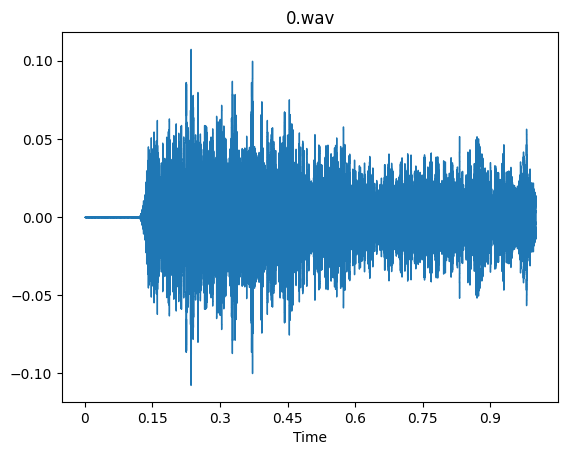

# Visualisations of the Time Series & FFTs, Filter Banks and MFCCs

In [ ]:
# Create the dictionaries to store the data
signals = {}
fft = {}
fbank = {}
mfccs = {}

# Create dictionaries to hold the cleaned data
cleaned_signals = {}
cleaned_fft = {}
cleaned_fbank = {}
cleaned_mfccs = {}

# Generate Time Series

In [ ]:
classes = ['Benjamin_Netanyau', 'Jens_Stoltenberg', 'Julia_Gillard', 'Magaret_Tarcher', 'Nelson_Mandela','_background_noise_']
samples=[1499]
for i, class_name in enumerate(classes):
    # idx=RandomSampler()
    wav_file = audio_files_paths[i][0]

    signal, rate = librosa.load(wav_file, sr=44100)

    signals[class_name] = signal
    fft[class_name] = FFT_caluation(signal, rate)
    bank = logfbank(signal[:rate], rate, nfilt=26, nfft=11030).T
    fbank[class_name] = bank
    mel = mfcc(signal[:rate], rate, numcep=13, nfilt=26, nfft=1103).T
    mfccs[class_name] = mel



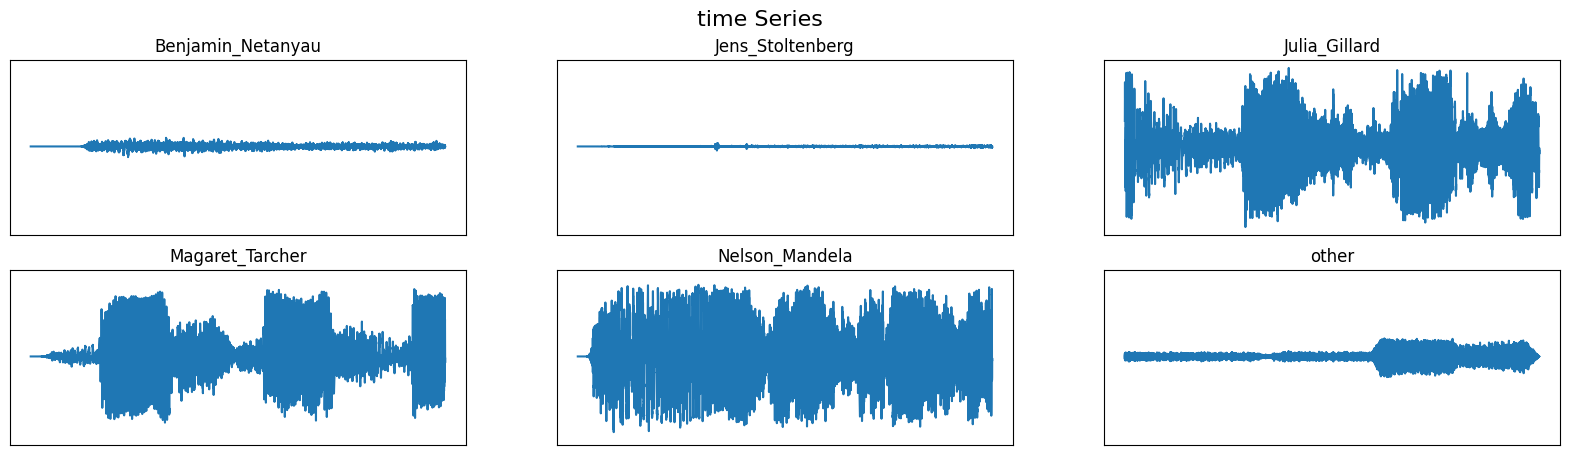

In [ ]:
Signal_Plot(signals)
plt.show()

# Plot the FFTs

<function matplotlib.pyplot.show(close=None, block=None)>

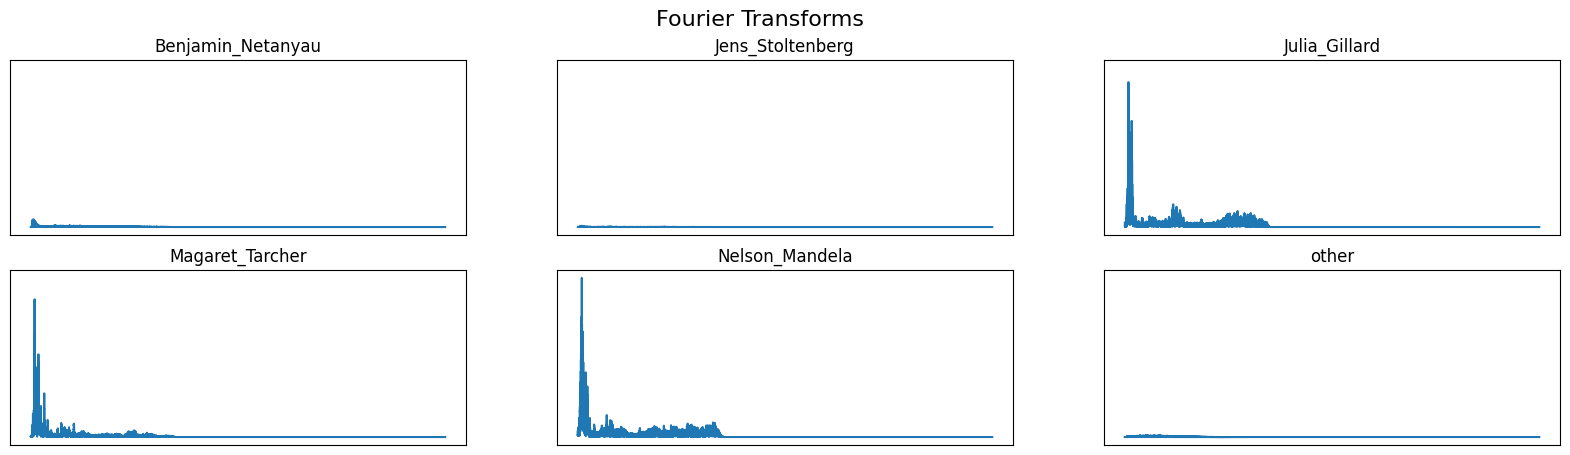

In [ ]:
FFT_Plot(fft)
plt.show

# Plot the Filter Banks

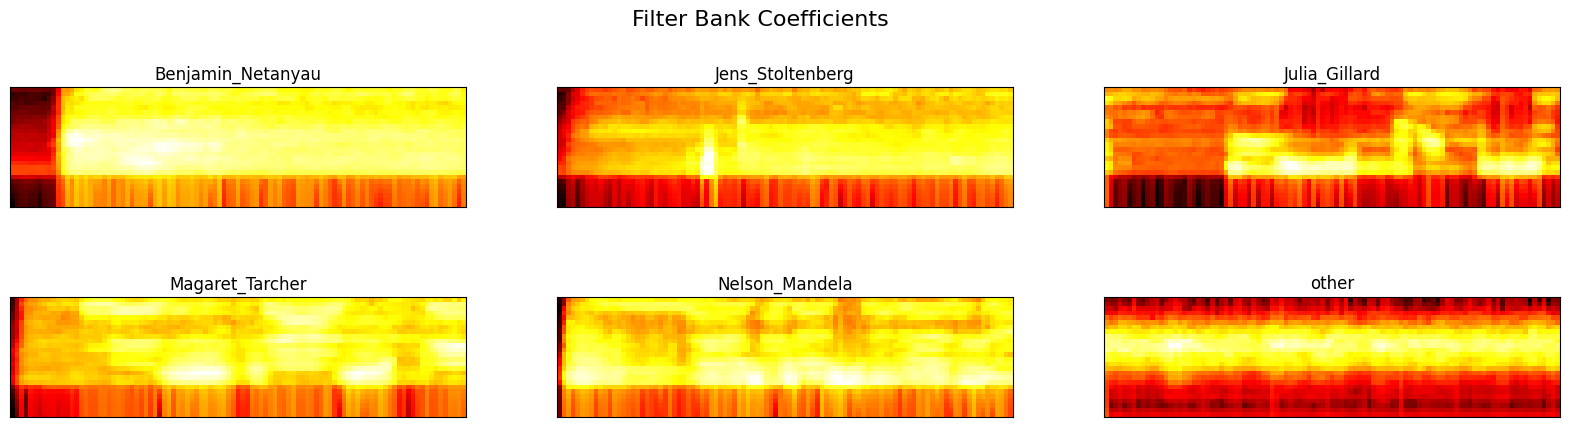

In [ ]:
fbank_plot(fbank)
plt.show()

# Plot The MFCCs

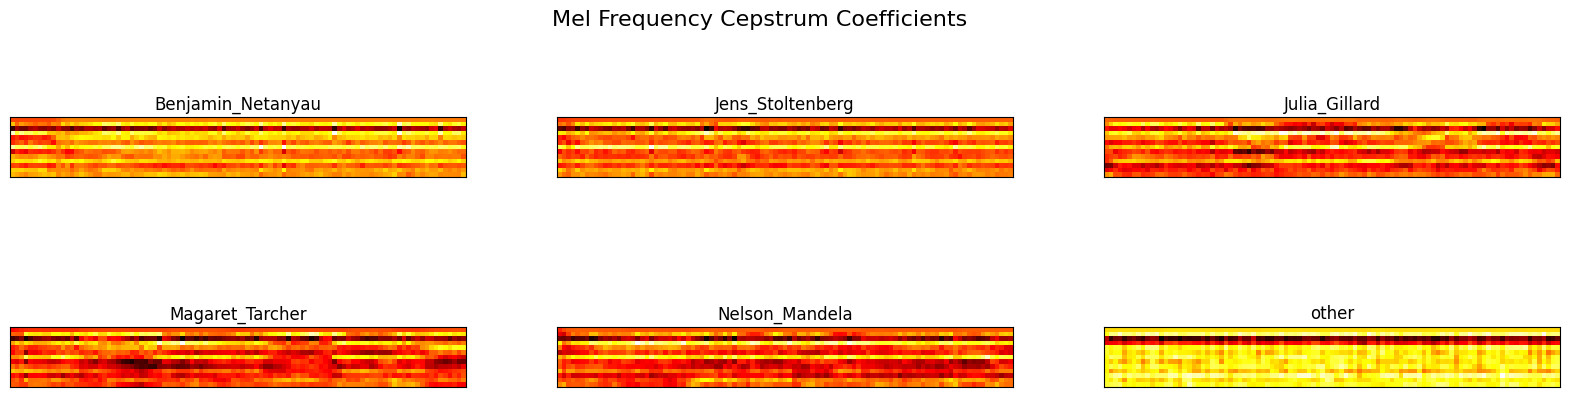

In [ ]:
mfccs_plot(mfccs)
plt.show()

# Removing the Dead Space in the Audio Files (Failed)

In [ ]:
classes = ['Benjamin_Netanyau', 'Jens_Stoltenberg', 'Julia_Gillard', 'Magaret_Tarcher', 'Nelson_Mandela','_background_noise_']

for i, class_name in enumerate(classes):
    wav_file = audio_files_paths[i][0]
    signal,rate=librosa.load(wav_file,sr=44100)
    mask=envelop(signal,rate,0.0005)
    signal=signal[mask]
    cleaned_signals[class_name]=signal
    cleaned_fft[class_name]=FFT_caluation(signal,rate)
    cleaned_bank=logfbank(signal[:rate],rate,nfilt=26,nfft=1103).T
    cleaned_fbank[class_name]=cleaned_bank
    cleaned_mel=mfcc(signal[:rate],rate,numcep=13,nfilt=26,nfft=1103).T
    cleaned_mfccs[class_name]=cleaned_mel






## View the Graphs again without the dead signals

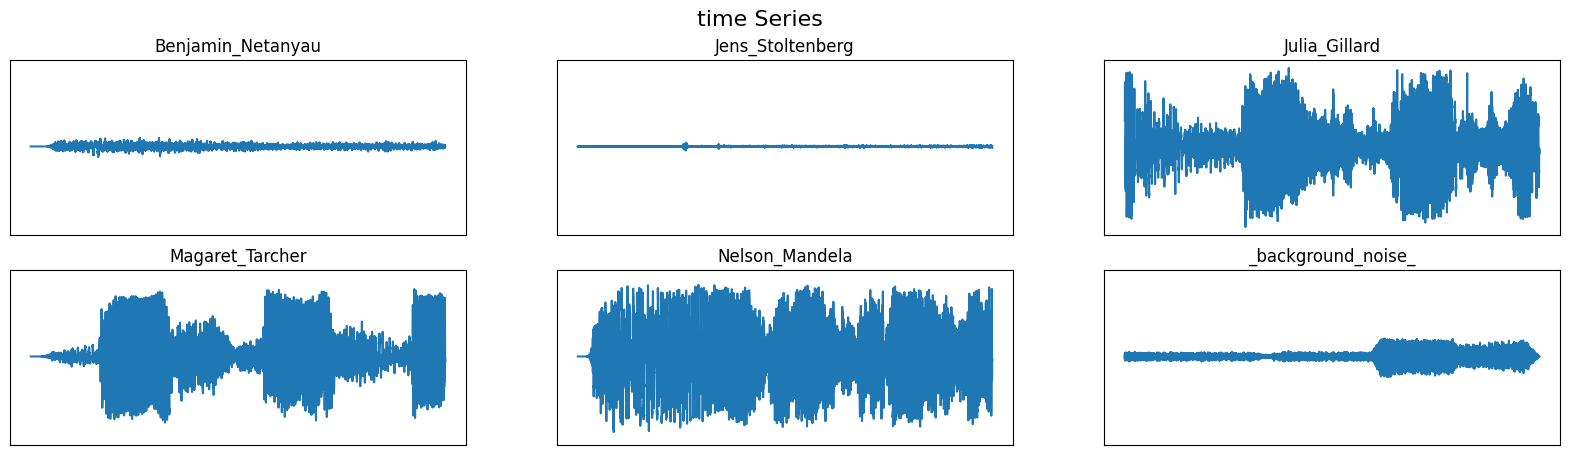

In [ ]:
Signal_Plot(cleaned_signals)
plt.show()

# Noise Reduction using CMS


We cannot garuntee in practical scenarios or in test cases that there will be no background noise. So there is need for some method of noise supression. We will do it by using either Cepstral Mean Substaction or CDCN algorthim. Here we demonstrate CMS on a segment with added background noise.

In [ ]:
import IPython.display as idis


In [ ]:
files

['tf_Wav_reader.py',
 'Jens_Stoltenberg',
 'Benjamin_Netanyau',
 'Magaret_Tarcher',
 'Julia_Gillard',
 'other',
 'Nelson_Mandela',
 '_background_noise_']

In [ ]:
noiseless_segments = {
    'Jens_Stoltenberg' : [
        "1021.wav",
        "1023.wav",
        "1026.wav",
        "1029.wav",
        "1034.wav",
        "1030.wav",
        "1046.wav",
        "1050.wav"
    ],
    'Benjamin_Netanyau': [
        "1.wav",
        "1001.wav",
        "1005.wav",
        "1011.wav",
        "1015.wav",
        "1064.wav",
        "1076.wav",
        "1099.wav"
    ],
    'Magaret_Tarcher'  : [
      "1014.wav",
      "1018.wav",
      "1024.wav",
      "1029.wav",
      "1041.wav",
      "1048.wav",
      "1064.wav",
      "1000.wav"
    ],
    'Julia_Gillard'    : [
      "1001.wav",
      "1011.wav",
      "1019.wav",
      "1023.wav",
      "1040.wav",
      "1043.wav",
      "1058.wav"
    ],
    'Nelson_Mandela'   : [
      "1004.wav",
      "1014.wav",
      "1021.wav",
      "1046.wav",
      "1063.wav",
      "1064.wav",
      "1067.wav",
      "1071.wav"
    ],
}

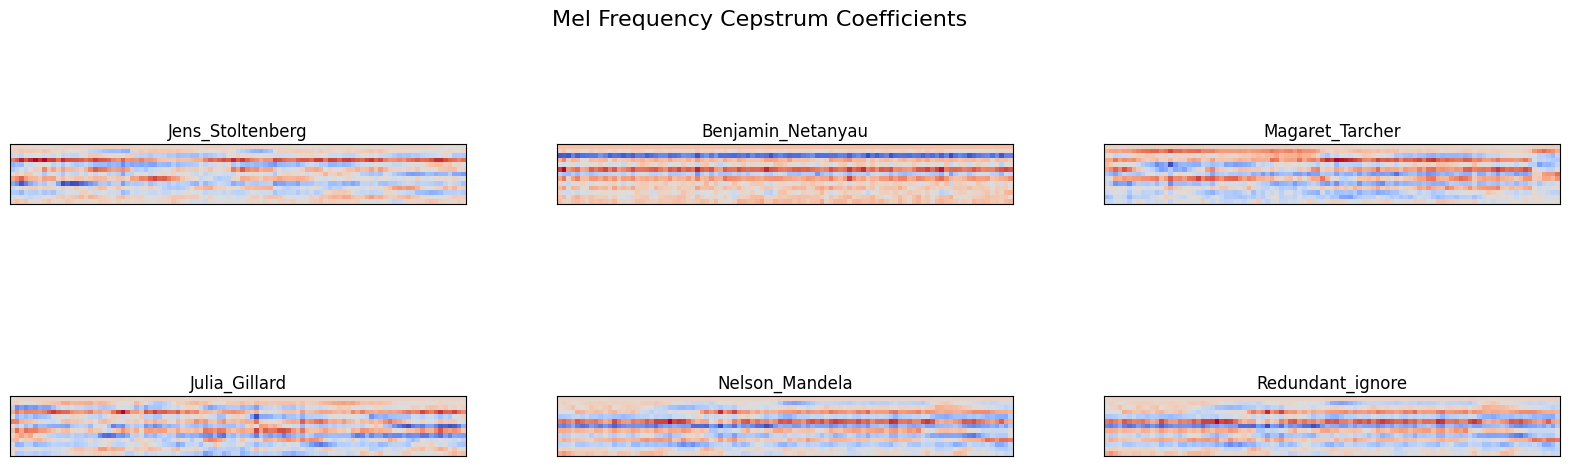

In [ ]:
x = 3
no_noise = dict()

for x in range(3,4):
  for i in noiseless_segments.keys():
    sig,sr = librosa.load("/content/drive/MyDrive/ml_data/16000_pcm_speeches/" + i + '/' + noiseless_segments[i][x],sr=22050)
    no_noise[i] = mfcc(sig[:sr], sr, numcep=13, nfilt=26, nfft=1103).T
  no_noise["Redundant_ignore"] = mfcc(sig[:sr], sr, numcep=13, nfilt=26, nfft=1103).T
  mfccs_plot(no_noise)

In [ ]:
noise_data, sr = librosa.load("/content/drive/MyDrive/ml_data/16000_pcm_speeches/_background_noise_/running_tap.wav", sr= 22050)

In [ ]:
import numpy as np

from IPython.display import Audio
# print(noise_data)
Audio(data=noise_data,rate=sr)

In [ ]:
segment_nd = 0.7*noise_data[:22050] + 0.3*librosa.load("/content/drive/MyDrive/ml_data/16000_pcm_speeches/" + "Nelson_Mandela" + '/' + "1021.wav",sr=22050)[0][:2*22050]
Audio(data=segment_nd,rate=22050)

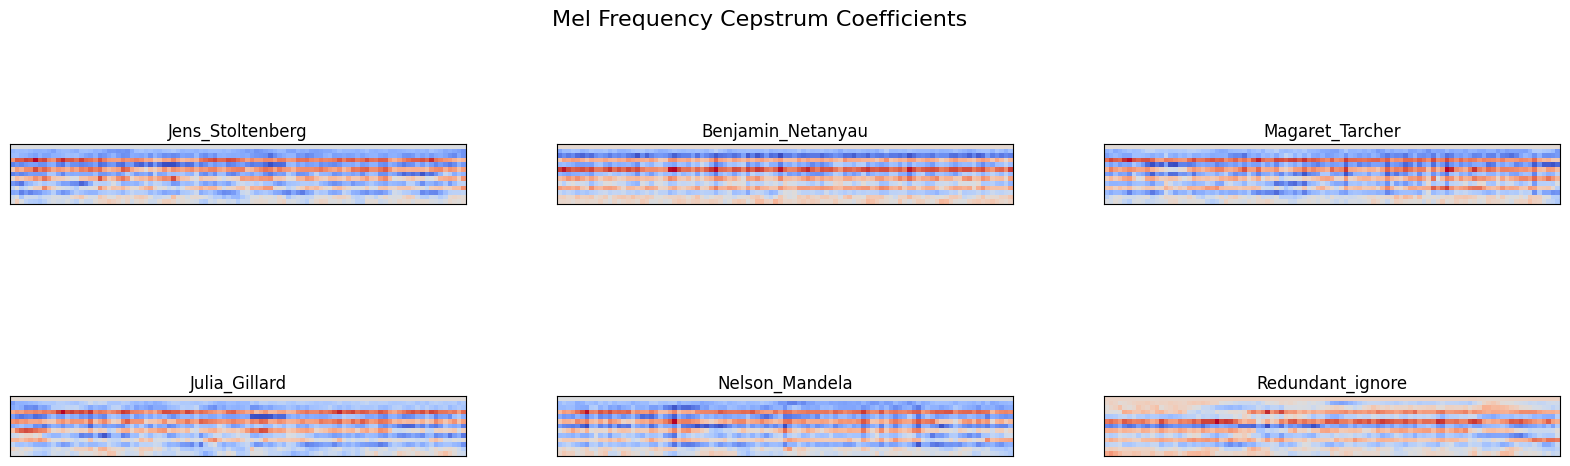

In [ ]:
x = 3
with_noise = dict()

for x in range(3,4):
  for i in noiseless_segments.keys():
    l = int(np.random.randint(0,5,1))
    noise_data, sr = librosa.load("/content/drive/MyDrive/ml_data/16000_pcm_speeches/_background_noise_/running_tap.wav", sr= 22050)
    sig,sr = librosa.load("/content/drive/MyDrive/ml_data/16000_pcm_speeches/" + i + '/' + noiseless_segments[i][x],sr=22050)
    with_noise[i] = mfcc(0.8*noise_data[l*sr:(l+1)*sr] + 0.2*sig[:sr], sr, numcep=13, nfilt=26, nfft=1103).T
  with_noise["Redundant_ignore"] = mfcc(sig[:sr], sr, numcep=13, nfilt=26, nfft=1103).T
  mfccs_plot(with_noise)

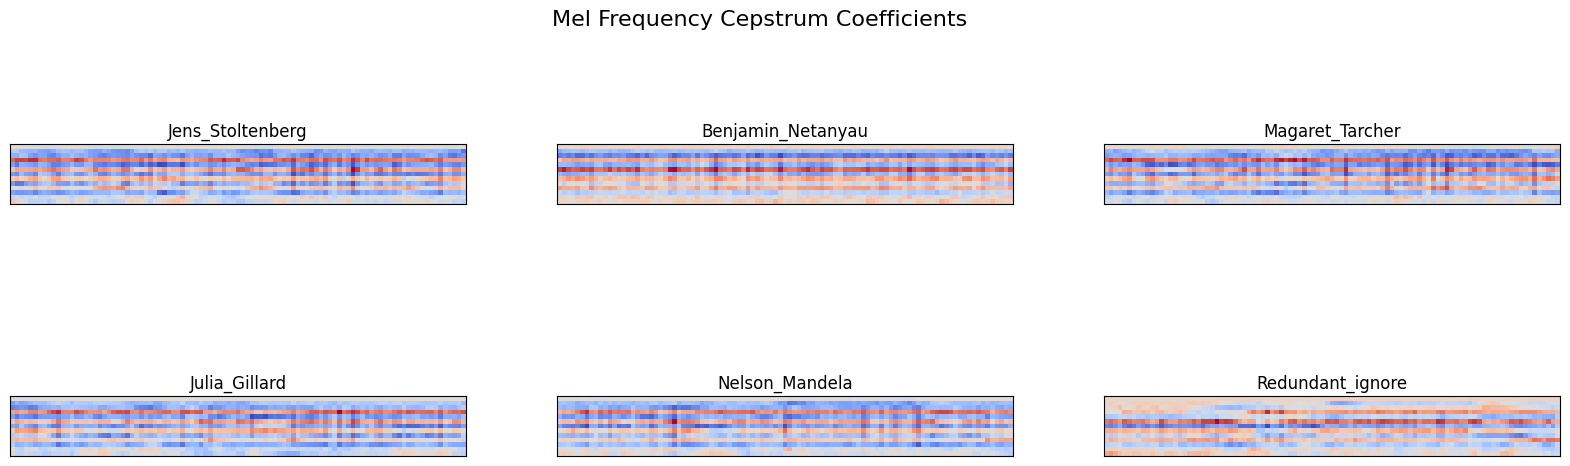

In [ ]:
x = 3
cms_noise = dict()

for x in range(3,4):
  for i in noiseless_segments.keys():
    l = int(np.random.randint(0,5,1))
    noise_data, sr = librosa.load("/content/drive/MyDrive/ml_data/16000_pcm_speeches/_background_noise_/running_tap.wav", sr= 22050)
    sig,sr = librosa.load("/content/drive/MyDrive/ml_data/16000_pcm_speeches/" + i + '/' + noiseless_segments[i][x],sr=22050)
    mf =  mfcc(0.8*noise_data[l*sr:(l+1)*sr] + 0.2*sig[:sr], sr, numcep=13, nfilt=26, nfft=1103).T
    # print((np.mean(mf,axis=0) + 1e-8))
    cms_noise[i] =  mf - (np.mean(mf,axis=0) + 1e-8)
  cms_noise["Redundant_ignore"] = mfcc(sig[:sr], sr, numcep=13, nfilt=26, nfft=1103).T
  mfccs_plot(cms_noise)

# Detecting Speech Segment Using Voice Activity Detection (VAD)

in the bottom text we have used  a simple VAD on noiseless data for demonstration purposes. Practical VAD algorithm will be more complex and will be able to handle noisy speech. This will be used to remove non-speech segment before forming training set.

In [ ]:

merged_audio, sample_rate = librosa.load(audio_files_paths[1][0], sr=22050)

for audio_file in audio_files_paths[1][1:20]:
    audio_segment, _ = librosa.load(audio_file, sr=22050)
    merged_audio = np.concatenate((merged_audio, audio_segment))


In [ ]:

def VAD(signal,sr=22050, thres=0.8,frame_length=100,hop_length=2):
  rmse = np.log(librosa.feature.rms(y=signal,frame_length=frame_length,hop_length=hop_length,center=True)[0])
  window = np.sign(((rmse - np.min(rmse))/ (np.max(rmse) - np.min(rmse))) - thres)
  return window

def VAD_Plot(signal,vad,sr,hop_length=2):
  plt.figure(figsize=(20,4))
  plt.title("Voice Activity Detection")
  t = librosa.frames_to_time(range(len(vad)), sr=sr, hop_length=hop_length)
  t1 = np.linspace(0,len(signal)/sr,num=len(signal))
  plt.plot(t1,signal)
  plt.xlabel("time in sec")
  plt.plot(t,vad)


In [ ]:
vad_ = VAD(merged_audio,sample_rate,frame_length = 4096,hop_length=100)
vad_

array([-1., -1., -1., ...,  1., -1., -1.], dtype=float32)

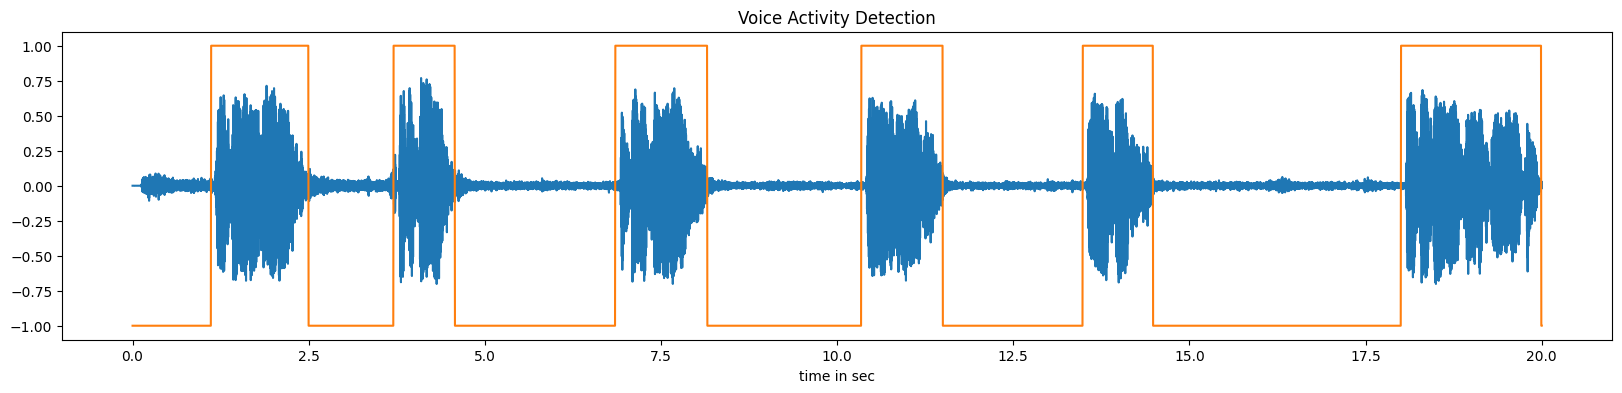

In [ ]:
VAD_Plot(merged_audio,vad_,sample_rate,100)

# BFCC


In [ ]:
noiseless_segments = {
    'Jens_Stoltenberg' : [
        "1021.wav",
        "1023.wav",
        "1026.wav",
        "1029.wav",
        "1034.wav",
        "1030.wav",
        "1046.wav",
        "1050.wav"
    ],
    'Benjamin_Netanyau': [
        "1.wav",
        "1001.wav",
        "1005.wav",
        "1011.wav",
        "1015.wav",
        "1064.wav",
        "1076.wav",
        "1099.wav"
    ],
    'Magaret_Tarcher'  : [
      "1014.wav",
      "1018.wav",
      "1024.wav",
      "1029.wav",
      "1041.wav",
      "1048.wav",
      "1064.wav",
      "1000.wav"
    ],
    'Julia_Gillard'    : [
      "1001.wav",
      "1011.wav",
      "1019.wav",
      "1023.wav",
      "1040.wav",
      "1043.wav",
      "1058.wav"
    ],
    'Nelson_Mandela'   : [
      "1004.wav",
      "1014.wav",
      "1021.wav",
      "1046.wav",
      "1063.wav",
      "1064.wav",
      "1067.wav",
      "1071.wav"
    ],
}

In [ ]:
!pip install spafe



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.5/93.5 kB 356.4 kB/s eta 0:00:00


In [ ]:
from spafe.features.bfcc import bfcc

bfccs = dict()

for x in range(3,4):
  for i in noiseless_segments.keys():
    l = int(np.random.randint(0,5,1))
    noise_data, sr = librosa.load("/content/drive/MyDrive/ml_data/16000_pcm_speeches/_background_noise_/running_tap.wav", sr= 22050)
    sig,sr = librosa.load("/content/drive/MyDrive/ml_data/16000_pcm_speeches/" + i + '/' + noiseless_segments[i][x],sr=22050)
    mf =  bfcc(sig[:sr], fs=sr).T
    bfccs[i] =  mf
bfccs["Redundant_ignore"] = bfcc(sig[:sr], fs=sr).T

In [ ]:
def bfccs_plot(bfccs):
    fig, axes = plt.subplots(nrows=2, ncols=3, sharex=False,
                             sharey=True, figsize=(20,6))
    fig.suptitle('Bark Frequency Cepstrum Coefficients', size=16)
    i = 0
    for x in range(2):
        for y in range(3):
            axes[x,y].set_title(list(bfccs.keys())[i])
            axes[x,y].imshow(list(bfccs.values())[i][1:],cmap='hot', interpolation='nearest')
            axes[x,y].get_xaxis().set_visible(False)
            axes[x,y].get_yaxis().set_visible(False)
            i += 1


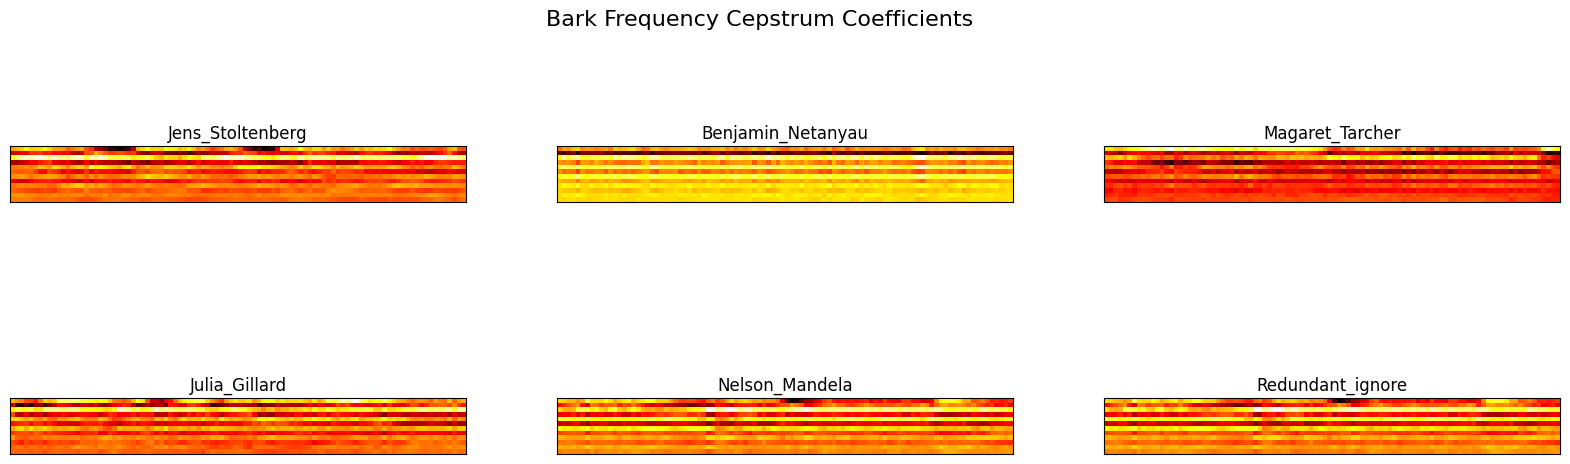

In [ ]:
bfccs_plot(bfccs)